In [1]:
import pandas as pd
import numpy as np
import aux.acessos as ac
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

## Base com os decis do Stonks

In [2]:
pb = pd.read_csv('outoftime_proba_decils_final.csv', sep =';')
len(pb)

134504

In [ ]:
pb['bin_temp'] = pd.qcut(pb['proba'], q=10, precision=1)
tres = pb.groupby('bin_temp').agg({'proba':['min', 'max']})
tres.columns = tres.columns.droplevel(0)
tres = tres.reset_index()
tres.head(10)

In [3]:
pb.head(20)

,Unnamed: 0,conta_cartao,proba,decil_score,year,month
0,0,4270104,0.121787,3,2022,5
1,1,4305804,0.119593,3,2022,5
2,2,4319104,0.162291,2,2022,5
3,3,44311750,0.049459,6,2022,5
4,4,44318360,0.141022,2,2022,5
5,5,44320860,0.746155,1,2022,5
6,6,44322630,0.732593,1,2022,5
7,7,44319870,0.258428,1,2022,5
8,8,44320680,0.177279,2,2022,5
9,9,44326470,0.081377,5,2022,5


In [4]:
pb['year-month'] = pb['year'] * 100 + pb['month']
pb['year-month'].value_counts()

202205    133797
202206       634
202207        73
Name: year-month, dtype: int64

## Base com visão única

In [70]:
# safras = ['2017', '2018', '2019', '2020', '2021', '2022']

# pers = pd.DataFrame()

# for i in safras:
#      query = "select id_customer, cpf, ds_safra, limite, pc_sow, renda_declarada, fx_atraso_jun22, nr_behavior_score, score_gh from public.flavia_costa_temp_visao_unica " + '\n'
#      query = query + "where substring(ds_safra, 1, 4) = '" 
#      query = query + i + "'"
#      print(query)
#      temp_pers = ac.df_athena_q('flavia-costa', query)
#      pers = pers.append(temp_pers)

# pers.to_pickle('stonks_picke.pkl')

In [71]:
infos = pd.read_pickle('stonks_picke.pkl')
len(infos)

3699237

In [72]:
#query = """
#    select id_customer, ds_safra, limite, pc_sow, renda_declarada, fx_atraso_jun22, nr_behavior_score, score_gh from public.flavia_costa_visao_unica

#    """
    
#infos = ac.df_athena('flavia-costa', query)
#len(infos)

In [73]:
def num(s):
    try:
        return int(s)
    except ValueError:
        return 0

In [74]:
infos['conta_cartao'] = infos['id_customer'].apply(num)
infos.head(3)

,id_customer,cpf,ds_safra,limite,pc_sow,renda_declarada,fx_atraso_jun22,nr_behavior_score,score_gh,conta_cartao
0,3441580,33028757893,2017-10,NaN,0.195907,0.01,0. Em dia,14.0,NaN,3441580
1,3453423,09395275456,2017-10,NaN,NaN,0.01,0. Em dia,NaN,NaN,3453423
2,3443959,14023659770,2017-10,NaN,0.000000,0.01,0. Em dia,NaN,NaN,3443959


## Join com visão unica

In [75]:
pb_add = pb.query('month == 6').join(infos.query('conta_cartao != 0').set_index('conta_cartao'), on='conta_cartao', how='left')
pb_add.head(5)

,Unnamed: 0,conta_cartao,proba,decil_score,year,month,year-month,id_customer,cpf,ds_safra,limite,pc_sow,renda_declarada,fx_atraso_jun22,nr_behavior_score,score_gh
1,1,4270104,0.195780,6,2022,6,202206,4270104,36116076149,2019-10,1200.0,0.838724,0.01,0. Em dia,13.0,15.0
3,3,4305804,0.186952,6,2022,6,202206,4305804,12407965442,2019-10,1000.0,0.555945,0.01,0. Em dia,12.0,11.0
4,4,4319104,0.170548,7,2022,6,202206,4319104,04641986231,2019-10,800.0,0.404372,0.01,0. Em dia,11.0,10.0
6,6,44311750,0.435859,3,2022,6,202206,44311750,02430026538,2020-01,800.0,NaN,0.01,0. Em dia,15.0,16.0
9,9,44315860,0.017592,8,2022,6,202206,44315860,02132474370,2020-01,700.0,NaN,0.01,0. Em dia,16.0,15.0


In [76]:
pb_add['ds_safra'].value_counts()

2021-11    25149
2021-10    21098
2021-09    16265
2021-03    14193
2021-07    13914
2021-04    13774
2021-12    13153
2021-08    12526
2020-10    12235
2021-05    11496
2020-11    11471
2020-12     9663
2021-02     8924
2021-06     8263
2021-01     7832
2020-01     7726
2020-09     6579
2020-02     6501
2020-03     4386
2020-07     3107
2020-08     2347
2020-06     2316
2020-04     2218
2020-05     1876
2019-10       31
2019-07       13
2019-08       11
2019-09       10
2019-11        8
2018-07        3
Name: ds_safra, dtype: int64

## Join com índice de engajamento

In [77]:
# digitos = ['0', '1', '2', '3', '4', '5', '6','7','8','9','10']

# pers = pd.DataFrame()

# for i in digitos:
#      query = "select cpf, engagement_index, credit_rfm_score  from customer_sandbox_zone.ca_engagement_index_202206 " + '\n'
#      query = query + "where substring(cast(cpf as varchar), 8, 1) = '" 
#      query = query + i + "'"
#      print(query)
#      temp_pers = ac.df_athena_q('flavia-costa', query)
#      pers = pers.append(temp_pers)

# pers.to_pickle('ie_jun22.pkl')



In [78]:
ie = pd.read_pickle('ie_jun22.pkl')
len(ie)

2209136

In [79]:
pb_add.columns

Index(['Unnamed: 0', 'conta_cartao', 'proba', 'decil_score', 'year', 'month',
       'year-month', 'id_customer', 'cpf', 'ds_safra', 'limite', 'pc_sow',
       'renda_declarada', 'fx_atraso_jun22', 'nr_behavior_score', 'score_gh'],
      dtype='object')

In [80]:
pb_add = pb_add.drop(columns=['Unnamed: 0'])
pb_add['cpf'] = pb_add['cpf'].apply(num)
ie['cpf'] = ie['cpf'].apply(num)

In [81]:
pb_add = pb_add.join(ie.set_index('cpf'), on = 'cpf', how = 'left')

In [82]:
pb_add.query('engagement_index > 0').head()

,conta_cartao,proba,decil_score,year,month,year-month,id_customer,cpf,ds_safra,limite,pc_sow,renda_declarada,fx_atraso_jun22,nr_behavior_score,score_gh,engagement_index,credit_rfm_score
1,4270104,0.195780,6,2022,6,202206,4270104,36116076149,2019-10,1200.0,0.838724,0.01,0. Em dia,13.0,15.0,0.726684,0.847458
3,4305804,0.186952,6,2022,6,202206,4305804,12407965442,2019-10,1000.0,0.555945,0.01,0. Em dia,12.0,11.0,0.680834,0.677966
4,4319104,0.170548,7,2022,6,202206,4319104,4641986231,2019-10,800.0,0.404372,0.01,0. Em dia,11.0,10.0,0.608648,0.610169
6,44311750,0.435859,3,2022,6,202206,44311750,2430026538,2020-01,800.0,NaN,0.01,0. Em dia,15.0,16.0,0.271186,0.338983
9,44315860,0.017592,8,2022,6,202206,44315860,2132474370,2020-01,700.0,NaN,0.01,0. Em dia,16.0,15.0,0.393220,0.491525


In [83]:
#preciso trazer o saldo restante (iu * limite) + spending do mes anterior

In [84]:
""" digitos = ['0', '1', '2', '3', '4', '5', '6','7','8','9','10']

pers = pd.DataFrame()

for i in digitos:
     query = "select cli.cpf, sum(case when ca.cd_yearmonth = 202207 then vl_total_spending end) as vl_spending_futuro, sum(case when ca.cd_yearmonth = 202206 then vl_total_spending end) as vl_spending_passado " + '\n'
     query = query + ", max(case when ca.cd_yearmonth = 202206 then pr_iu end) as pr_iu " + '\n'
     query = query + " from customer_curated_zone.ca_book_cartao ca left join customer_curated_zone.ca_book_cliente cli on (cli.id_customer = ca.id_customer) " + '\n'
     query = query + "where  cli.cd_yearmonth = 202206 " + '\n'
     query = query + "and substring(cast(cli.cpf as varchar), 8, 1) = '" 
     query = query + i + "'" + '\n'
     query = query + "group by 1 "
     print(query)
     temp_pers = ac.df_athena_q('flavia-costa', query)
     pers = pers.append(temp_pers)

pers.to_pickle('spending_jul.pkl') """

select cli.cpf, sum(case when ca.cd_yearmonth = 202207 then vl_total_spending end) as vl_spending_futuro, sum(case when ca.cd_yearmonth = 202206 then vl_total_spending end) as vl_spending_passado 
, max(case when ca.cd_yearmonth = 202206 then pr_iu end) as pr_iu 
 from customer_curated_zone.ca_book_cartao ca left join customer_curated_zone.ca_book_cliente cli on (cli.id_customer = ca.id_customer) 
where  cli.cd_yearmonth = 202206 
and substring(cast(cli.cpf as varchar), 8, 1) = '0'
group by 1 


/tmp/ipykernel_392009/3667099769.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pers = pers.append(temp_pers)


select cli.cpf, sum(case when ca.cd_yearmonth = 202207 then vl_total_spending end) as vl_spending_futuro, sum(case when ca.cd_yearmonth = 202206 then vl_total_spending end) as vl_spending_passado 
, max(case when ca.cd_yearmonth = 202206 then pr_iu end) as pr_iu 
 from customer_curated_zone.ca_book_cartao ca left join customer_curated_zone.ca_book_cliente cli on (cli.id_customer = ca.id_customer) 
where  cli.cd_yearmonth = 202206 
and substring(cast(cli.cpf as varchar), 8, 1) = '1'
group by 1 


/tmp/ipykernel_392009/3667099769.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pers = pers.append(temp_pers)


select cli.cpf, sum(case when ca.cd_yearmonth = 202207 then vl_total_spending end) as vl_spending_futuro, sum(case when ca.cd_yearmonth = 202206 then vl_total_spending end) as vl_spending_passado 
, max(case when ca.cd_yearmonth = 202206 then pr_iu end) as pr_iu 
 from customer_curated_zone.ca_book_cartao ca left join customer_curated_zone.ca_book_cliente cli on (cli.id_customer = ca.id_customer) 
where  cli.cd_yearmonth = 202206 
and substring(cast(cli.cpf as varchar), 8, 1) = '2'
group by 1 


/tmp/ipykernel_392009/3667099769.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pers = pers.append(temp_pers)


select cli.cpf, sum(case when ca.cd_yearmonth = 202207 then vl_total_spending end) as vl_spending_futuro, sum(case when ca.cd_yearmonth = 202206 then vl_total_spending end) as vl_spending_passado 
, max(case when ca.cd_yearmonth = 202206 then pr_iu end) as pr_iu 
 from customer_curated_zone.ca_book_cartao ca left join customer_curated_zone.ca_book_cliente cli on (cli.id_customer = ca.id_customer) 
where  cli.cd_yearmonth = 202206 
and substring(cast(cli.cpf as varchar), 8, 1) = '3'
group by 1 


/tmp/ipykernel_392009/3667099769.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pers = pers.append(temp_pers)


select cli.cpf, sum(case when ca.cd_yearmonth = 202207 then vl_total_spending end) as vl_spending_futuro, sum(case when ca.cd_yearmonth = 202206 then vl_total_spending end) as vl_spending_passado 
, max(case when ca.cd_yearmonth = 202206 then pr_iu end) as pr_iu 
 from customer_curated_zone.ca_book_cartao ca left join customer_curated_zone.ca_book_cliente cli on (cli.id_customer = ca.id_customer) 
where  cli.cd_yearmonth = 202206 
and substring(cast(cli.cpf as varchar), 8, 1) = '4'
group by 1 


/tmp/ipykernel_392009/3667099769.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pers = pers.append(temp_pers)


select cli.cpf, sum(case when ca.cd_yearmonth = 202207 then vl_total_spending end) as vl_spending_futuro, sum(case when ca.cd_yearmonth = 202206 then vl_total_spending end) as vl_spending_passado 
, max(case when ca.cd_yearmonth = 202206 then pr_iu end) as pr_iu 
 from customer_curated_zone.ca_book_cartao ca left join customer_curated_zone.ca_book_cliente cli on (cli.id_customer = ca.id_customer) 
where  cli.cd_yearmonth = 202206 
and substring(cast(cli.cpf as varchar), 8, 1) = '5'
group by 1 


/tmp/ipykernel_392009/3667099769.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pers = pers.append(temp_pers)


select cli.cpf, sum(case when ca.cd_yearmonth = 202207 then vl_total_spending end) as vl_spending_futuro, sum(case when ca.cd_yearmonth = 202206 then vl_total_spending end) as vl_spending_passado 
, max(case when ca.cd_yearmonth = 202206 then pr_iu end) as pr_iu 
 from customer_curated_zone.ca_book_cartao ca left join customer_curated_zone.ca_book_cliente cli on (cli.id_customer = ca.id_customer) 
where  cli.cd_yearmonth = 202206 
and substring(cast(cli.cpf as varchar), 8, 1) = '6'
group by 1 


/tmp/ipykernel_392009/3667099769.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pers = pers.append(temp_pers)


select cli.cpf, sum(case when ca.cd_yearmonth = 202207 then vl_total_spending end) as vl_spending_futuro, sum(case when ca.cd_yearmonth = 202206 then vl_total_spending end) as vl_spending_passado 
, max(case when ca.cd_yearmonth = 202206 then pr_iu end) as pr_iu 
 from customer_curated_zone.ca_book_cartao ca left join customer_curated_zone.ca_book_cliente cli on (cli.id_customer = ca.id_customer) 
where  cli.cd_yearmonth = 202206 
and substring(cast(cli.cpf as varchar), 8, 1) = '7'
group by 1 


/tmp/ipykernel_392009/3667099769.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pers = pers.append(temp_pers)


select cli.cpf, sum(case when ca.cd_yearmonth = 202207 then vl_total_spending end) as vl_spending_futuro, sum(case when ca.cd_yearmonth = 202206 then vl_total_spending end) as vl_spending_passado 
, max(case when ca.cd_yearmonth = 202206 then pr_iu end) as pr_iu 
 from customer_curated_zone.ca_book_cartao ca left join customer_curated_zone.ca_book_cliente cli on (cli.id_customer = ca.id_customer) 
where  cli.cd_yearmonth = 202206 
and substring(cast(cli.cpf as varchar), 8, 1) = '8'
group by 1 


/tmp/ipykernel_392009/3667099769.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pers = pers.append(temp_pers)


select cli.cpf, sum(case when ca.cd_yearmonth = 202207 then vl_total_spending end) as vl_spending_futuro, sum(case when ca.cd_yearmonth = 202206 then vl_total_spending end) as vl_spending_passado 
, max(case when ca.cd_yearmonth = 202206 then pr_iu end) as pr_iu 
 from customer_curated_zone.ca_book_cartao ca left join customer_curated_zone.ca_book_cliente cli on (cli.id_customer = ca.id_customer) 
where  cli.cd_yearmonth = 202206 
and substring(cast(cli.cpf as varchar), 8, 1) = '9'
group by 1 


/tmp/ipykernel_392009/3667099769.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pers = pers.append(temp_pers)


select cli.cpf, sum(case when ca.cd_yearmonth = 202207 then vl_total_spending end) as vl_spending_futuro, sum(case when ca.cd_yearmonth = 202206 then vl_total_spending end) as vl_spending_passado 
, max(case when ca.cd_yearmonth = 202206 then pr_iu end) as pr_iu 
 from customer_curated_zone.ca_book_cartao ca left join customer_curated_zone.ca_book_cliente cli on (cli.id_customer = ca.id_customer) 
where  cli.cd_yearmonth = 202206 
and substring(cast(cli.cpf as varchar), 8, 1) = '10'
group by 1 


/tmp/ipykernel_392009/3667099769.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pers = pers.append(temp_pers)


In [85]:
sp = pd.read_pickle('spending_jul.pkl')
len(sp)

2741696

In [86]:
del pers

In [87]:
sp['cpf'] = sp['cpf'].apply(num)
pb_add = pb_add.join(sp.set_index('cpf'), on = 'cpf', how = 'left')

In [88]:
del infos
del pb
del ie
del sp

## Faixas para variáveis de exploração

In [89]:
#Trabalhar com Behaviour, Limite, Renda, Share of Wallet, GH e Dias Atraso
pb_add['limite_bin']= pd.cut(x=pb_add['limite'], bins=[0,500,1000,2000,3000,4000,5000,50000])
pb_add['sow_bin']= pd.cut(x=pb_add['pc_sow'], bins=[0,0.2,0.5,0.7,1])
pb_add['renda_declarada_bin'] = pd.cut(x=pb_add['renda_declarada'], bins=[0,500,1000,2000,3000,4000,5000,50000])
#fx_atraso_jun22
#nr_behavior_score
#score_gh
pb_add['proba_bin']= pd.cut(x=pb_add['proba'], bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
pb_add['ie_bin']= pd.cut(x=pb_add['engagement_index'], bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
pb_add['cred_bin']= pd.cut(x=pb_add['credit_rfm_score'], bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

In [90]:
pb_add['ie_bin'].value_counts()

(0.5, 0.6]    49201
(0.6, 0.7]    48571
(0.4, 0.5]    35287
(0.7, 0.8]    33355
(0.3, 0.4]    23549
(0.2, 0.3]    15176
(0.8, 0.9]    13768
(0.1, 0.2]     6170
(0.9, 1.0]     1581
(0.0, 0.1]     1114
Name: ie_bin, dtype: int64

In [91]:
pb_add['cred_bin'].value_counts()

(0.6, 0.7]    50302
(0.7, 0.8]    45199
(0.5, 0.6]    40316
(0.4, 0.5]    27861
(0.8, 0.9]    24260
(0.3, 0.4]    18803
(0.2, 0.3]    11689
(0.1, 0.2]     4889
(0.9, 1.0]     3542
(0.0, 0.1]      910
Name: cred_bin, dtype: int64

<Figure size 2160x3600 with 0 Axes>

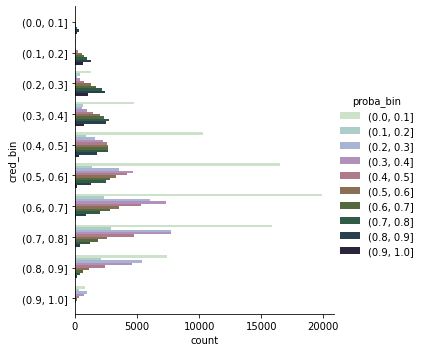

In [17]:
plt.figure(figsize = (30,50))
sns.catplot(data = pb_add, y = 'cred_bin', hue = 'proba_bin', kind='count', palette="ch:s=1,rot=-2")
plt.show()

## Gráficos

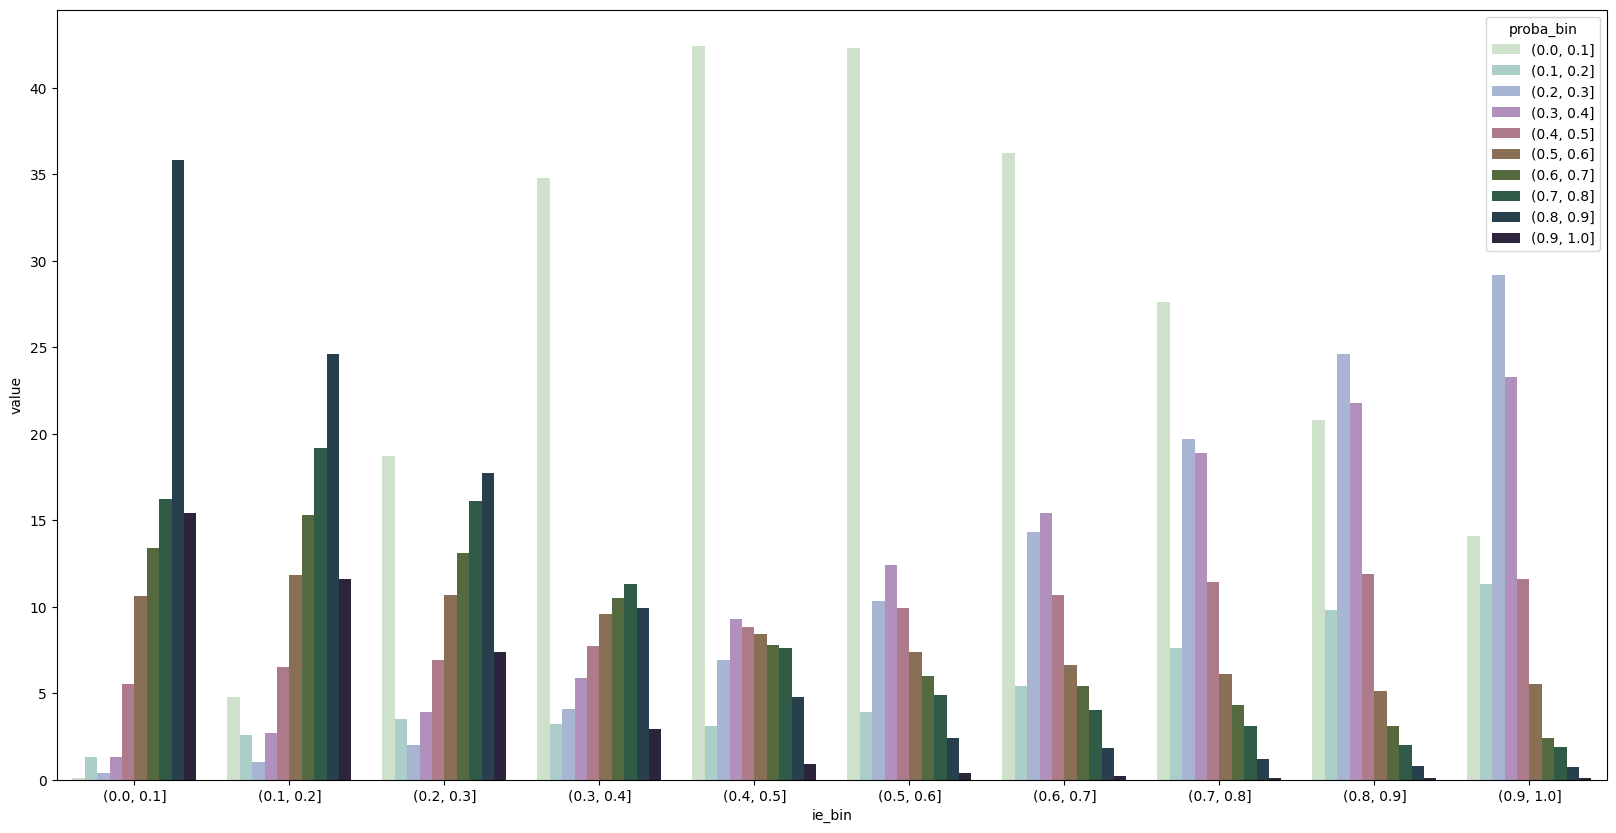

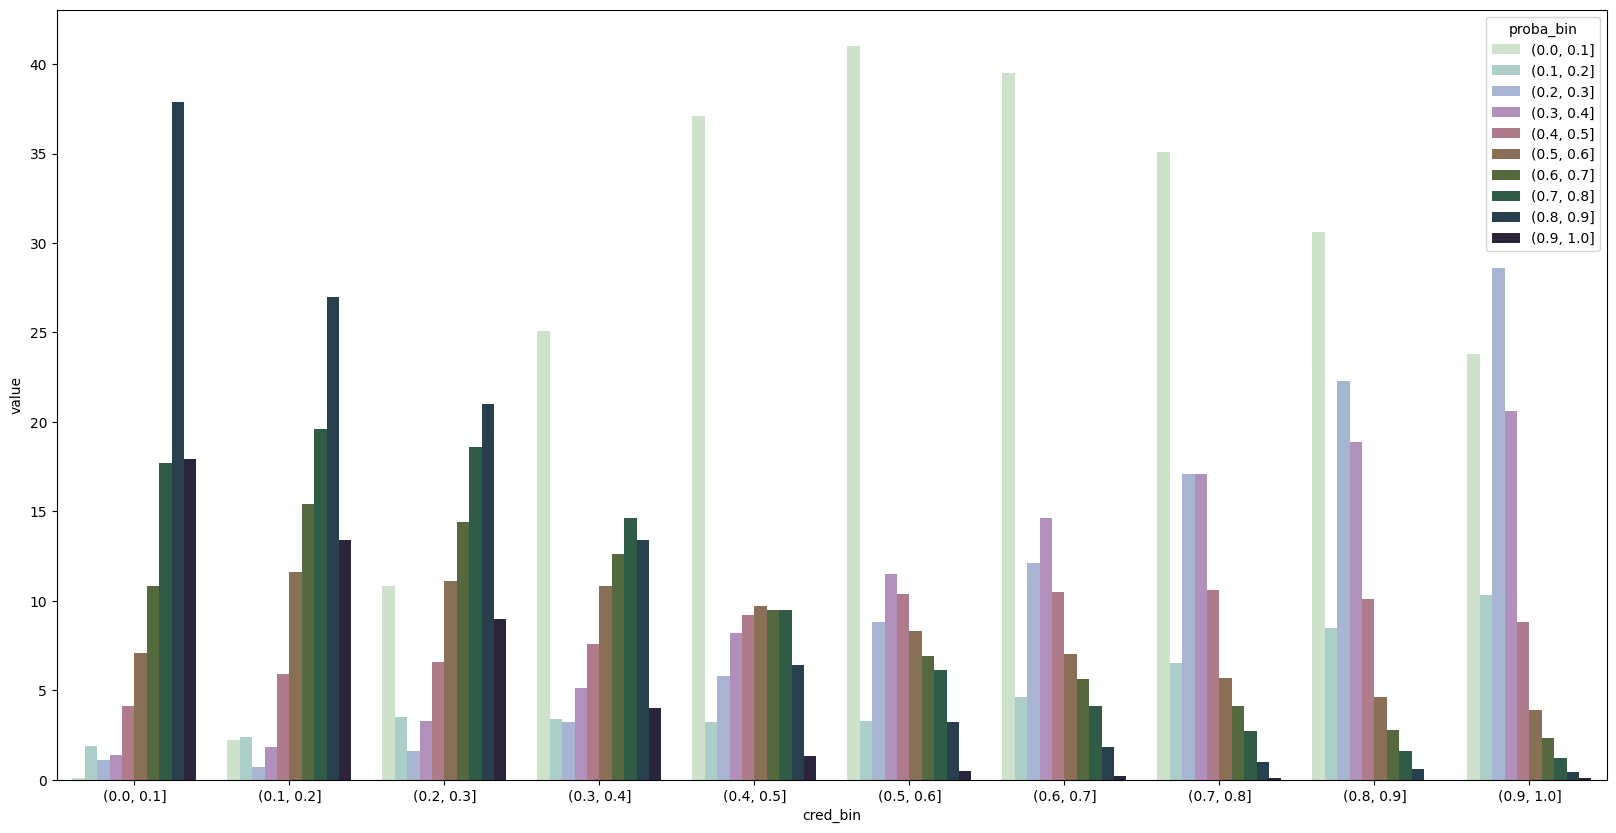

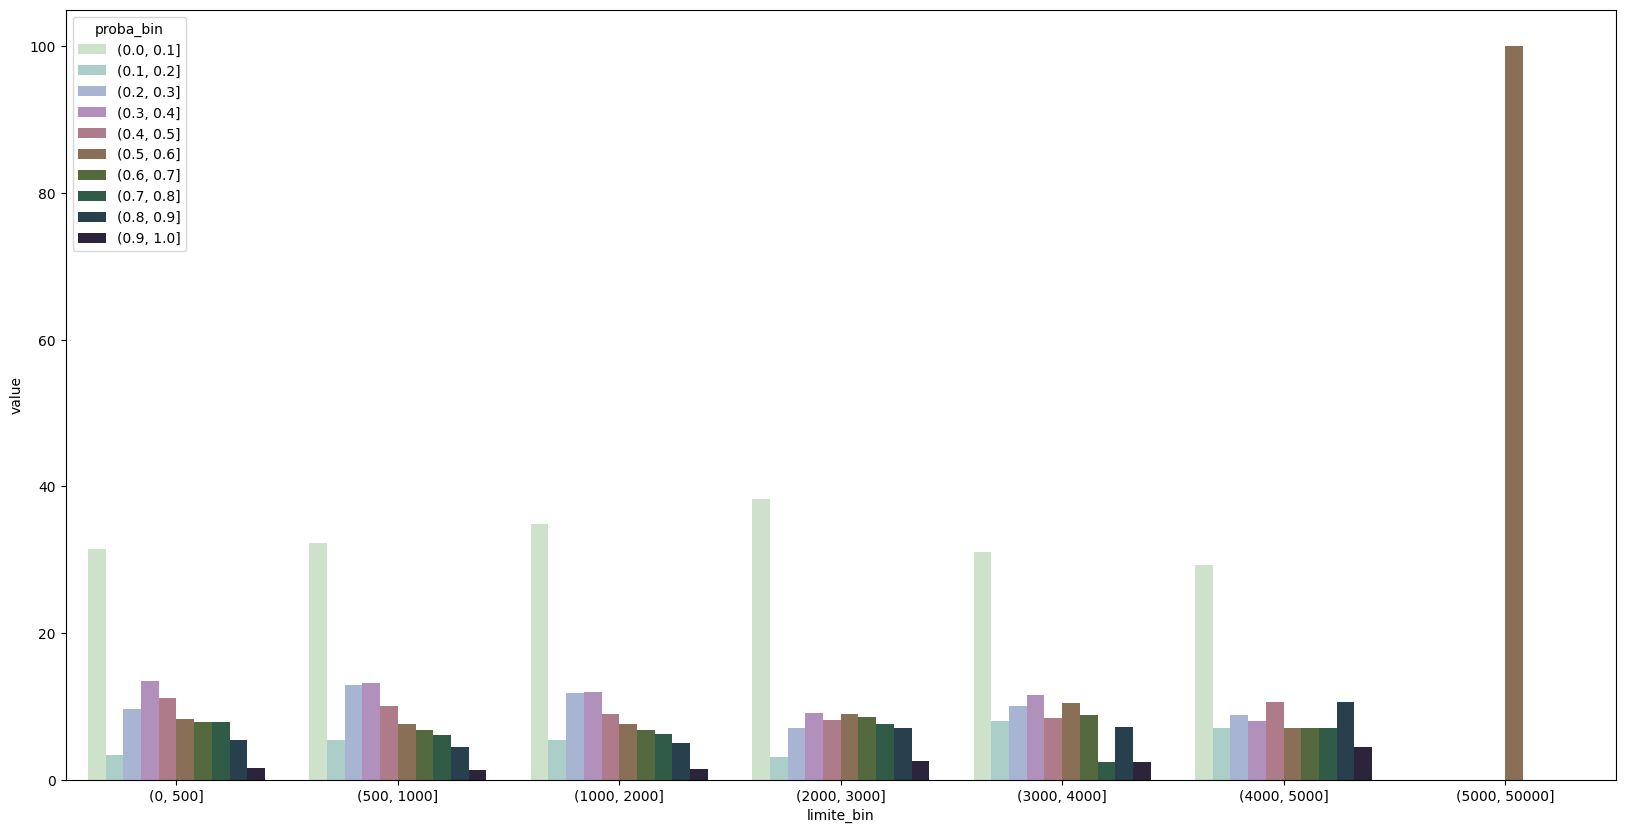

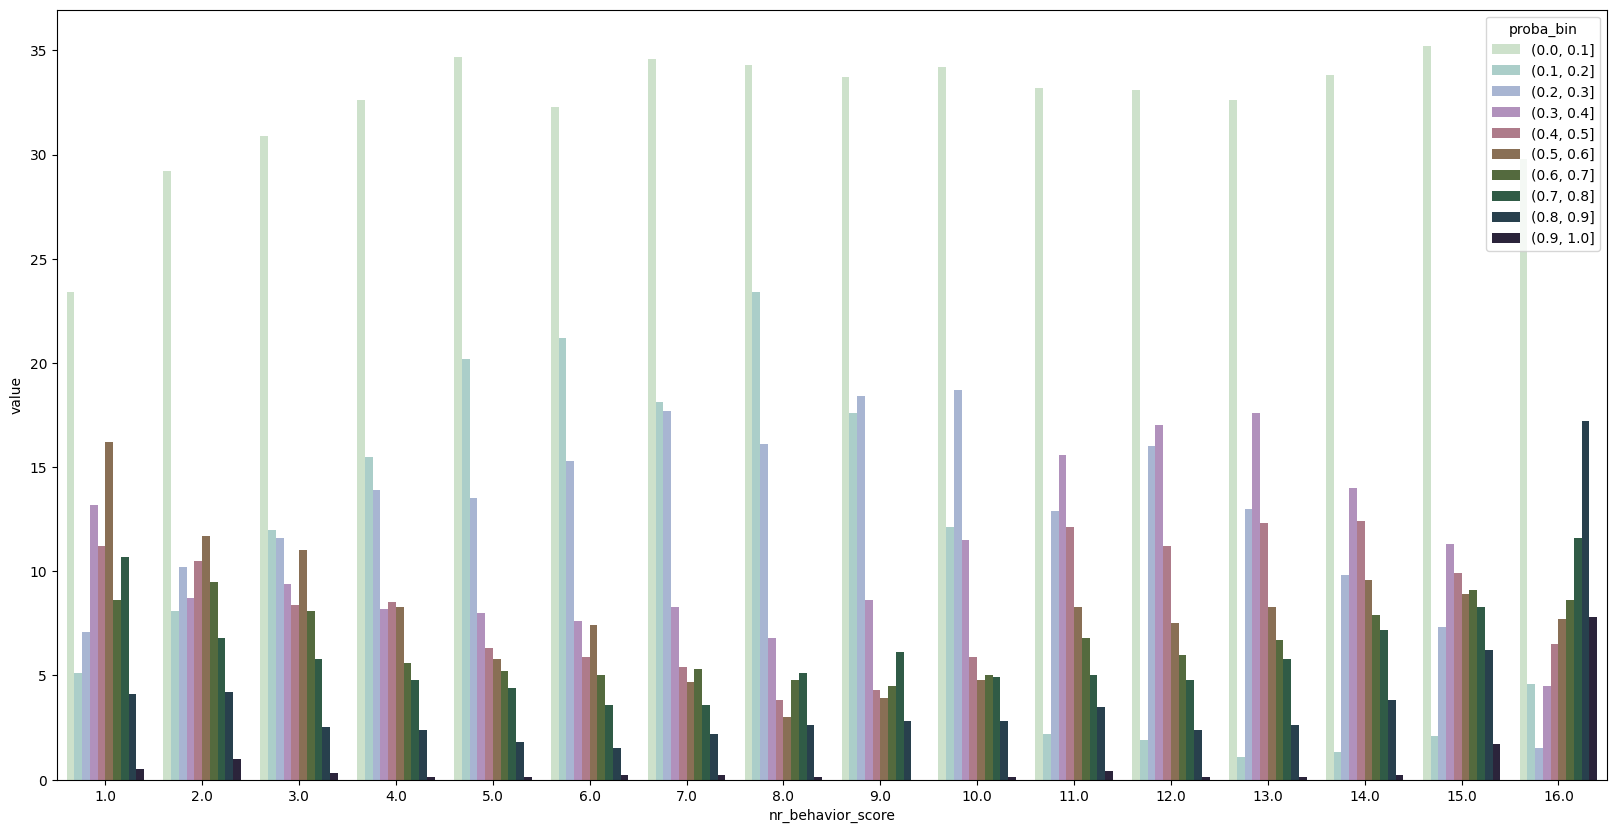

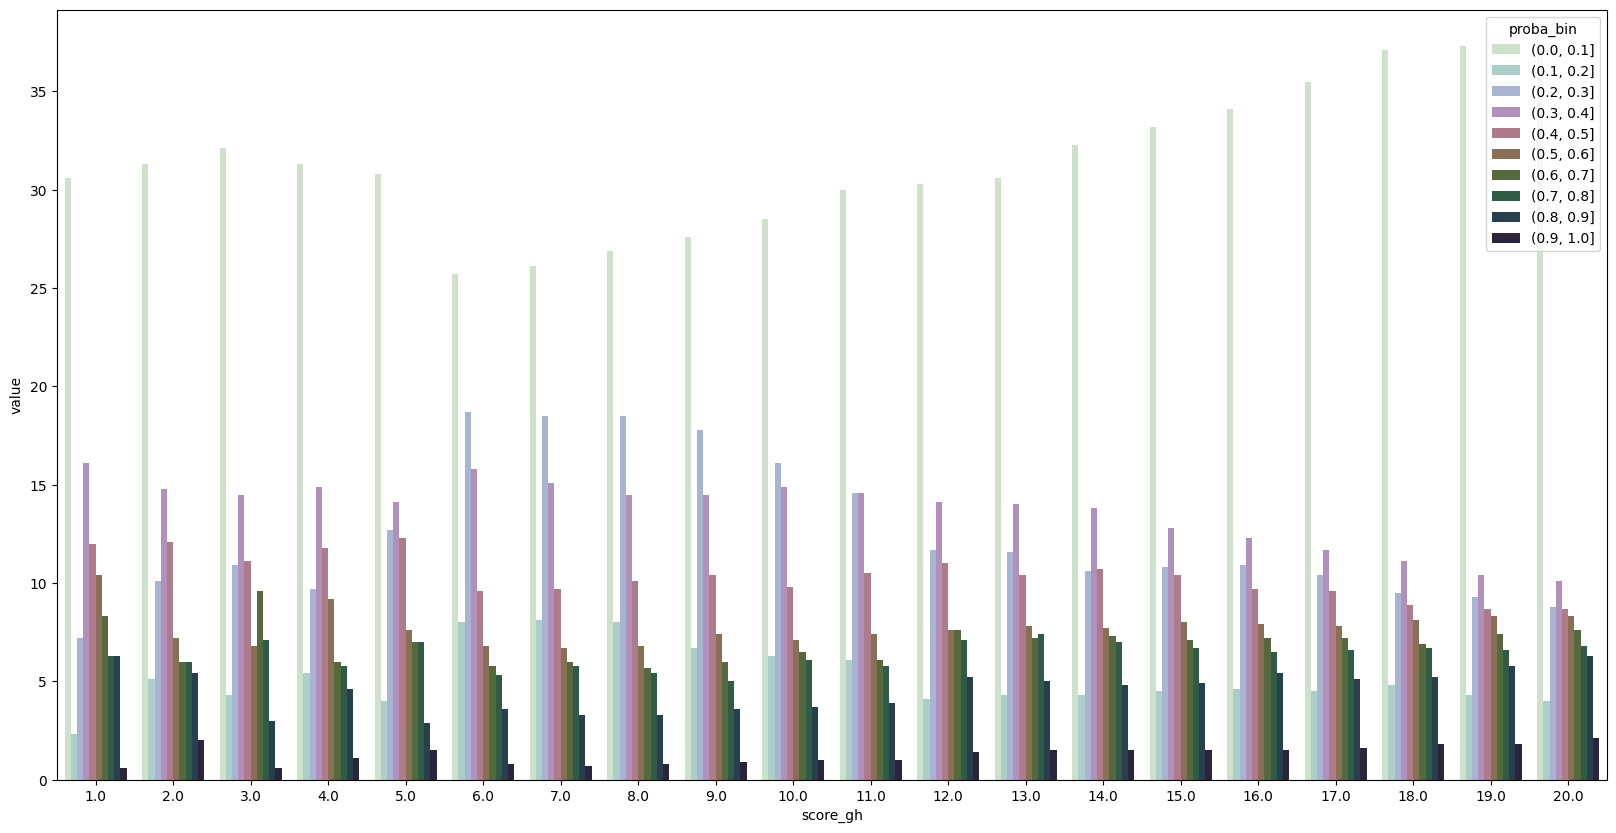

In [38]:
vars_agregacao = ['ie_bin' , 'cred_bin', 'limite_bin', 'nr_behavior_score', 'score_gh']

for i in vars_agregacao:
    group_var = 'proba_bin'
    x_var = i
    campo_contagem = 'count'
    agg = pb_add.groupby([i, group_var]).agg({'conta_cartao':['count']})
    agg.columns = agg.columns.droplevel(0)
    agg = agg.reset_index()
    df_viz = agg.pivot_table(columns=x_var,index = group_var, values=campo_contagem, aggfunc=np.sum)

    for i in df_viz.columns:
        df_viz[i] = df_viz[i] / df_viz[i].sum()

    df_viz = df_viz.reset_index()
    df_viz = pd.melt(df_viz, id_vars=[group_var])
    df_viz['value'] = df_viz['value'] * 100
    x = df_viz[x_var].astype('str')
    y = df_viz[group_var].astype('str')
    z = df_viz.value.round(1)
    plt.figure(figsize = (20,10))
    sns.barplot(data = df_viz, x = x, y = z, hue = y, palette="ch:s=1,rot=-2")
    plt.show()



In [29]:
#agg.query('nr_behavior_score >= 11').groupby('proba_bin').sum('count').head(20)

,nr_behavior_score,score_gh,count
proba_bin,,,
"(0.0, 0.1]",3175200.0,2469600.0,49660
"(0.1, 0.2]",3175200.0,2469600.0,3084
"(0.2, 0.3]",3175200.0,2469600.0,16125
"(0.3, 0.4]",3175200.0,2469600.0,20992
"(0.4, 0.5]",3175200.0,2469600.0,16458
"(0.5, 0.6]",3175200.0,2469600.0,12629
"(0.6, 0.7]",3175200.0,2469600.0,11091
"(0.7, 0.8]",3175200.0,2469600.0,10241
"(0.8, 0.9]",3175200.0,2469600.0,7689


In [25]:
#agg.groupby('proba_bin').sum('count').head(20)

,nr_behavior_score,score_gh,count
proba_bin,,,
"(0.0, 0.1]",5331200.0,6585600.0,63738
"(0.1, 0.2]",5331200.0,6585600.0,10088
"(0.2, 0.3]",5331200.0,6585600.0,23003
"(0.3, 0.4]",5331200.0,6585600.0,24549
"(0.4, 0.5]",5331200.0,6585600.0,18665
"(0.5, 0.6]",5331200.0,6585600.0,14744
"(0.6, 0.7]",5331200.0,6585600.0,13210
"(0.7, 0.8]",5331200.0,6585600.0,12187
"(0.8, 0.9]",5331200.0,6585600.0,8689


IE - tem uma galera com probabilidade de queda bem pequena mas que mesmo assim está localizada nas faixas entre 20% e 50% de ie
Pq?

cred_bin de 0.3 a 0.5 - abrir em prob de queda baixa x alta
levantar médias:

- limite
- pc_sow
- renda_declarada
- ds_safra

In [24]:
#pb_add.query('credit_rfm_score >= 0.3 & credit_rfm_score <= 0.5')


pb_add['flag_baixo_ie_cred']  = np.where(pb_add['credit_rfm_score'] <= 0.5,  'ENGAJAMENTO BAIXO', 'ENGAJAMENTO ALTO')

pb_add.head()

,conta_cartao,proba,decil_score,year,month,year-month,id_customer,cpf,ds_safra,limite,...,engagement_index,credit_rfm_score,limite_bin,sow_bin,renda_declarada_bin,proba_bin,ie_bin,cred_bin,count,flag_baixo_ie_cred
1,4270104,0.195780,6,2022,6,202206,4270104,36116076149,2019-10,1200.0,...,0.726684,0.847458,"(1000, 2000]","(0.7, 1.0]","(0, 500]","(0.1, 0.2]","(0.7, 0.8]","(0.8, 0.9]",1,ENGAJAMENTO ALTO
3,4305804,0.186952,6,2022,6,202206,4305804,12407965442,2019-10,1000.0,...,0.680834,0.677966,"(500, 1000]","(0.5, 0.7]","(0, 500]","(0.1, 0.2]","(0.6, 0.7]","(0.6, 0.7]",1,ENGAJAMENTO ALTO
4,4319104,0.170548,7,2022,6,202206,4319104,4641986231,2019-10,800.0,...,0.608648,0.610169,"(500, 1000]","(0.2, 0.5]","(0, 500]","(0.1, 0.2]","(0.6, 0.7]","(0.6, 0.7]",1,ENGAJAMENTO ALTO
6,44311750,0.435859,3,2022,6,202206,44311750,2430026538,2020-01,800.0,...,0.271186,0.338983,"(500, 1000]",NaN,"(0, 500]","(0.4, 0.5]","(0.2, 0.3]","(0.3, 0.4]",1,ENGAJAMENTO BAIXO
9,44315860,0.017592,8,2022,6,202206,44315860,2132474370,2020-01,700.0,...,0.393220,0.491525,"(500, 1000]",NaN,"(0, 500]","(0.0, 0.1]","(0.3, 0.4]","(0.4, 0.5]",1,ENGAJAMENTO BAIXO


In [26]:
pb_add['flag_baixa_prob']  = np.where((pb_add['proba'] <= 0.4),  1, 0)
pb_add[['limite', 'pc_sow', 'renda_declarada', 'flag_baixo_ie_cred', 'flag_baixa_prob']].query('flag_baixo_ie_cred == 1').groupby('flag_baixa_prob').mean()

,limite,pc_sow,renda_declarada
flag_baixa_prob,,,


In [49]:
#!pip install imblearn

In [37]:
pb_add.dtypes

conta_cartao              int64
proba                   float64
decil_score               int64
year                      int64
month                     int64
year-month                int64
id_customer              object
cpf                       int64
ds_safra                 object
limite                  float64
pc_sow                  float64
renda_declarada         float64
fx_atraso_jun22          object
nr_behavior_score       float64
score_gh                float64
engagement_index        float64
credit_rfm_score        float64
limite_bin             category
sow_bin                category
renda_declarada_bin    category
proba_bin              category
ie_bin                 category
cred_bin               category
count                     int64
flag_baixo_ie_cred       object
flag_baixa_prob           int64
dtype: object


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

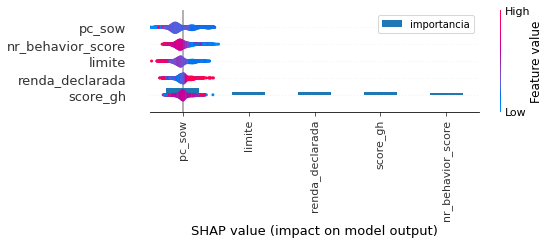

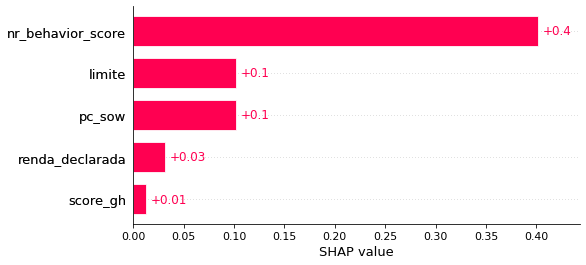

In [63]:
#modelo express só pra rodar a importância
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
import shap


#Parâmetros
dataset_modelo = pb_add.query('flag_baixo_ie_cred == "ENGAJAMENTO BAIXO"')
preditores = ['limite', 'pc_sow', 'renda_declarada', 'score_gh', 'nr_behavior_score']
target = ['flag_baixa_prob']
tam_teste = 0.2
features_graficos = 5


colunas_modelo = preditores + target
for column in colunas_modelo:
  if dataset_modelo[column].dtype == 'object':
    dataset_modelo[column].fillna(dataset_modelo[column].mode()[0], inplace = True)
  elif dataset_modelo[column].dtype != 'object':
    dataset_modelo[column].fillna(dataset_modelo[column].median(), inplace = True)


x_train, x_test, y_train, y_test = train_test_split(dataset_modelo[preditores]
                                                    , dataset_modelo[target]
                                                    , random_state=42, test_size=tam_teste)
ros = RandomOverSampler(random_state = 42)
X_ros, Y_ros = ros.fit_resample(x_train, y_train)
arvores = [20, 50, 100, 300, 400, 500]
accuracy_array = []

for i in arvores:
  rf = RandomForestClassifier(n_estimators=i)
  rf.fit(X_ros, Y_ros)
  y_predicted_rf = rf.predict(x_test)
  accuracy_rf = metrics.accuracy_score(y_test, y_predicted_rf).round(4)
  accuracy_array.append(accuracy_rf)
rf_estimators = pd.DataFrame(list(zip(arvores, accuracy_array)), columns =['arvores', 'acuracia'])
best_rf = RandomForestClassifier(n_estimators= rf_estimators['arvores'][rf_estimators['acuracia'].idxmax()])
best_rf.fit(X_ros, Y_ros)
explainer = shap.Explainer(best_rf.predict, x_test)
shap_values = explainer(x_test)
shap.summary_plot(shap_values, plot_type='violin')
shap.plots.bar(shap_values[0])
importance_df = pd.DataFrame(best_rf.feature_importances_, columns = ['importancia'], index = preditores)
importance_df.sort_values(by='importancia', ascending=False).head(15).plot.bar(figsize=(20,5))
features_importantes = importance_df.sort_values(by='importancia', ascending=False).head(features_graficos).index



Comparando clientes com baixo engajamento, aqueles com menor probabilidade de queda tem uma renda declarada muito maior (média)

<AxesSubplot:xlabel='flag_baixa_prob', ylabel='renda_declarada'>

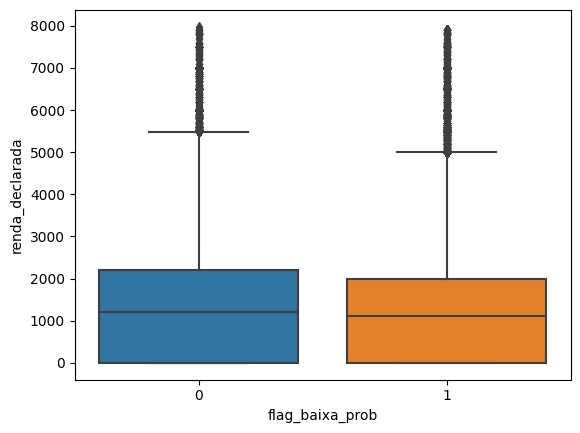

In [61]:
sns.boxplot(data = pb_add.query('renda_declarada < 8000'), y = 'renda_declarada', x = 'flag_baixa_prob')

<AxesSubplot:xlabel='flag_baixa_prob', ylabel='renda_declarada'>

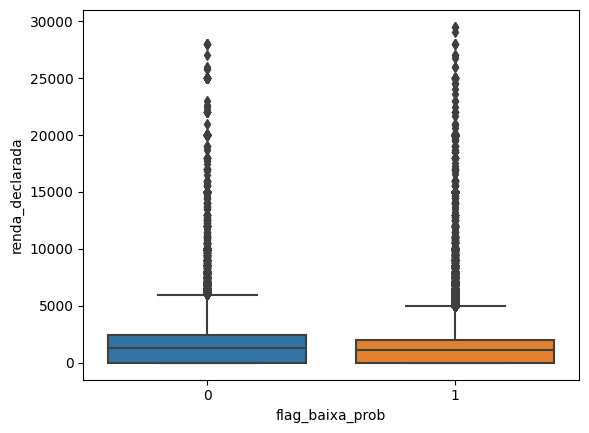

In [67]:
sns.boxplot(data = pb_add.query('renda_declarada < 30000'), y = 'renda_declarada', x = 'flag_baixa_prob')

<AxesSubplot:xlabel='flag_baixa_prob', ylabel='pc_sow'>

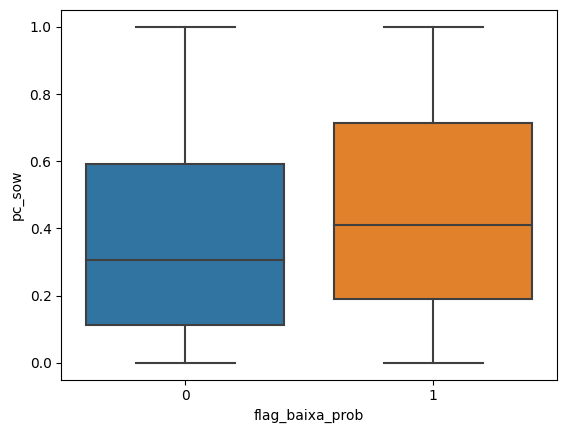

In [68]:
sns.boxplot(data = pb_add, y = 'pc_sow', x = 'flag_baixa_prob')

Porém examinando o box plot vemos que o share of wallet é o que mais difere dos clientes com e sem chance de queda: o share of wallet é maior nos clientes com baixa chance de queda

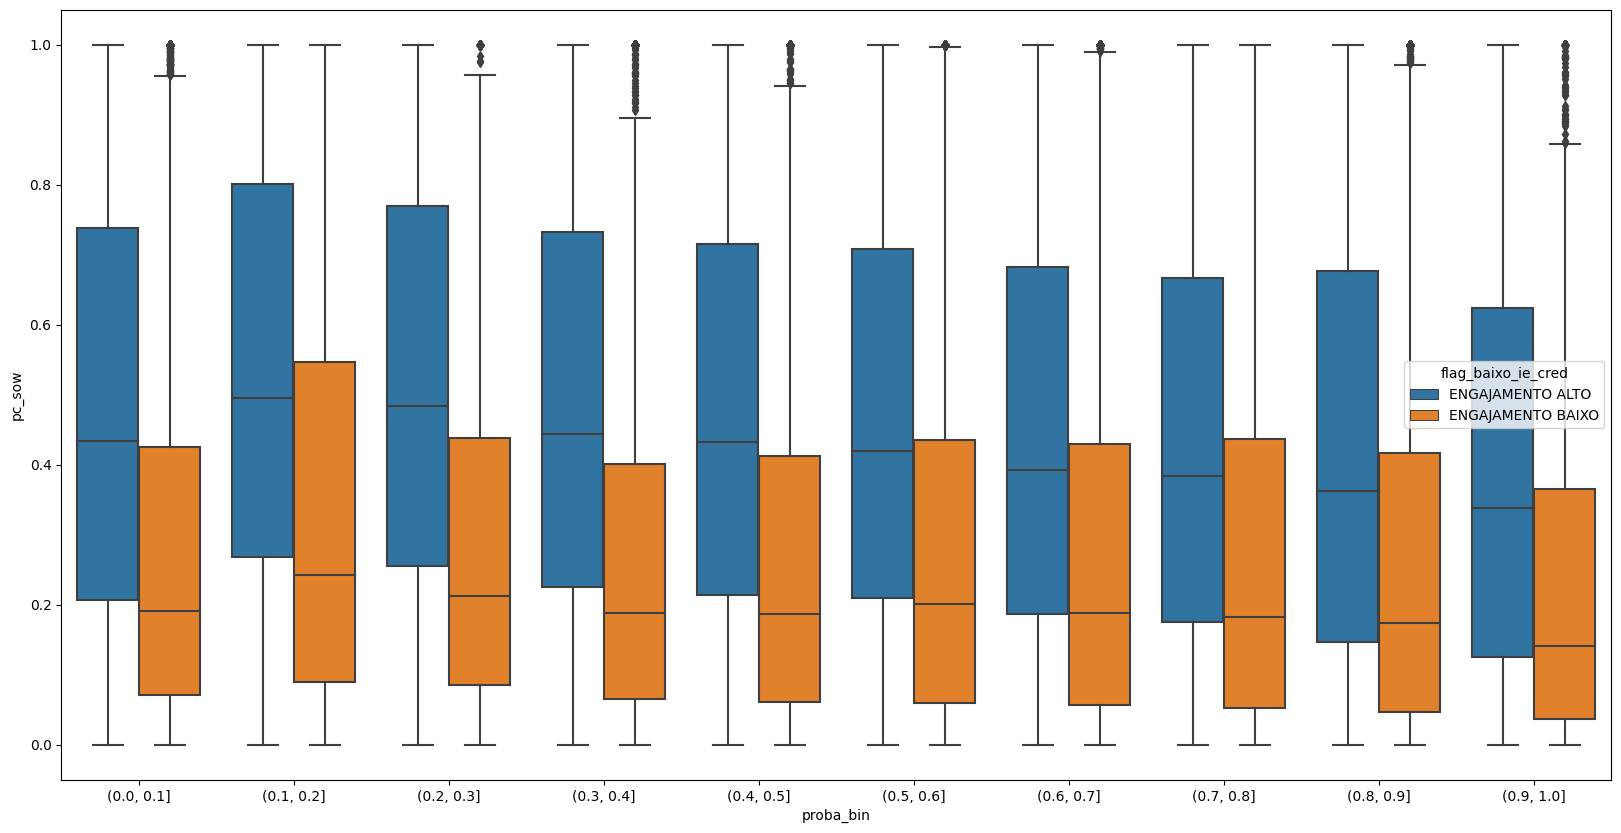

In [76]:
plt.figure(figsize = (20,10))
sns.boxplot(data = pb_add, y = 'pc_sow', x = 'proba_bin', hue='flag_baixo_ie_cred')
plt.show()

In [102]:
pb_add['faixa_ie']  = np.where( (pb_add['credit_rfm_score'] < 0.3) ,  'A - ENGAJAMENTO BAIXO',
   np.where( (pb_add['credit_rfm_score'] >= 0.3) & (pb_add['credit_rfm_score'] <= 0.6),  'B - ENGAJAMENTO MEDIANO', 'C - ENGAJAMENTO ALTO'))

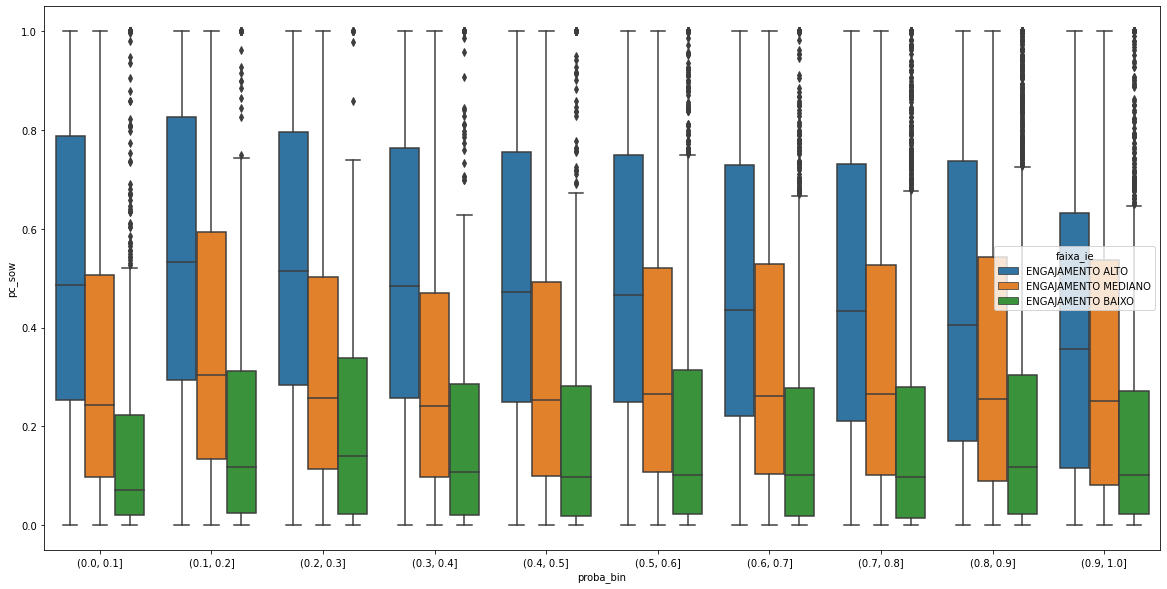

In [19]:
plt.figure(figsize = (20,10))
sns.boxplot(data = pb_add, y = 'pc_sow', x = 'proba_bin', hue='faixa_ie')
plt.show()

In [101]:
pb_add['faixa_stonks']  = np.where( (pb_add['proba'] < 0.3) ,  'A - RISCO DE QUEDA BAIXO',
   np.where( (pb_add['proba'] >= 0.3) & (pb_add['proba'] <= 0.6),  'B - RISCO DE QUEDA MEDIANO', 'C - RISCO DE QUEDA ALTO'))

In [29]:
pb_add[['cpf', 'nr_behavior_score']].groupby('nr_behavior_score').count()

,cpf
nr_behavior_score,
1.0,197
2.0,589
3.0,1090
4.0,1882
5.0,2708
6.0,3649
7.0,9921
8.0,6056
9.0,6588


In [93]:
print("pode rodar a simulação")

pode rodar a simulação


In [100]:
pb_add['faixa_behaviour']  = np.where( (pb_add['nr_behavior_score'] < 6) ,  'C - ALTO RISCO DE CREDITO',
   np.where( (pb_add['nr_behavior_score'] >= 6) & (pb_add['nr_behavior_score'] <= 11),  'B - MEDIO RISCO DE CREDITO', 'A - BAIXO RISCO DE CREDITO'))

In [26]:
agg = pb_add.groupby(['faixa_ie', 'faixa_stonks']).agg({'cpf':['count']})
agg.columns = agg.columns.droplevel(0)
agg = agg.reset_index()
agg = agg.pivot_table(columns='faixa_stonks',index = 'faixa_ie', values='count', aggfunc=np.sum)

In [27]:
agg.head(10)

faixa_stonks,A - RISCO DE QUEDA BAIXO,B - RISCO DE QUEDA MEDIANO,C - RISCO DE QUEDA ALTO
faixa_ie,,,
A - ENGAJAMENTO BAIXO,2144,3521,11824
B - ENGAJAMENTO MEDIANO,40237,24132,22611
C - ENGAJAMENTO ALTO,75146,44524,12952


In [31]:
agg = pb_add.groupby(['faixa_behaviour', 'faixa_stonks']).agg({'cpf':['count']})
agg.columns = agg.columns.droplevel(0)
agg = agg.reset_index()
agg = agg.pivot_table(columns='faixa_stonks',index = 'faixa_behaviour', values='count', aggfunc=np.sum)

In [96]:
agg.head(10)

NameError: name 'agg' is not defined

In [98]:
pb_add.columns

Index(['conta_cartao', 'proba', 'decil_score', 'year', 'month', 'year-month',
       'id_customer', 'cpf', 'ds_safra', 'limite', 'pc_sow', 'renda_declarada',
       'fx_atraso_jun22', 'nr_behavior_score', 'score_gh', 'engagement_index',
       'credit_rfm_score', 'vl_spending_futuro', 'vl_spending_passado',
       'pr_iu', 'limite_bin', 'sow_bin', 'renda_declarada_bin', 'proba_bin',
       'ie_bin', 'cred_bin', 'faixa_stonks', 'faixa_behaviour'],
      dtype='object')

In [127]:
pb_add['vl_spending_futuro'] = pb_add['vl_spending_futuro'].fillna(0.0)
pb_add['vl_spending_passado'] = pb_add['vl_spending_passado'].fillna(0.0)
pb_add['queda'] = np.where(pb_add['vl_spending_passado'] > pb_add['vl_spending_futuro'], 1, 0)

In [128]:
pb_add[['queda', 'vl_spending_passado', 'vl_spending_futuro', 'limite']].head(10)

,queda,vl_spending_passado,vl_spending_futuro,limite
1,1,879.34,0.00,1200.0
3,1,1699.13,9.78,1000.0
4,0,1450.00,1475.00,800.0
6,0,203.97,294.27,800.0
9,1,643.48,583.00,700.0
11,1,571.15,538.53,800.0
13,0,88.00,326.66,700.0
14,0,0.00,2276.69,600.0
17,0,0.00,20.00,400.0
20,1,2337.50,1040.90,1200.0


In [129]:
pb_add[['faixa_stonks','queda', 'vl_spending_futuro', 'vl_spending_passado', 'limite']].groupby(['faixa_stonks']).mean()

,queda,vl_spending_futuro,vl_spending_passado,limite
faixa_stonks,,,,
A - RISCO DE QUEDA BAIXO,0.560280,536.437327,616.626109,906.756689
B - RISCO DE QUEDA MEDIANO,0.496848,496.556189,527.638882,853.314535
C - RISCO DE QUEDA ALTO,0.226855,299.892459,179.530282,884.668133


In [110]:
#1) calcular o saldo
#2) somar o spending passado e futuro + saldo
#3) quebrar por faixas de IE e Behaviour
pb_add['cont'] = 1
pb_add['iu_cor'] = np.where(pb_add['pr_iu'] > 1, 1, pb_add['pr_iu'])
pb_add['saldo'] = pb_add['limite'] - (pb_add['iu_cor'] * pb_add['limite'] )
pb_add[['faixa_behaviour', 'faixa_ie', 'faixa_stonks','cont' , 'saldo', 'vl_spending_futuro', 'vl_spending_passado', 'limite']].groupby(['faixa_behaviour', 'faixa_ie', 'faixa_stonks']).sum()

cont  \
faixa_behaviour            faixa_ie                faixa_stonks                        
A - BAIXO RISCO DE CREDITO A - ENGAJAMENTO BAIXO   A - RISCO DE QUEDA BAIXO       51   
                                                   B - RISCO DE QUEDA MEDIANO    511   
                                                   C - RISCO DE QUEDA ALTO       308   
                           B - ENGAJAMENTO MEDIANO A - RISCO DE QUEDA BAIXO     1711   
                                                   B - RISCO DE QUEDA MEDIANO    728   
                                                   C - RISCO DE QUEDA ALTO       487   
                           C - ENGAJAMENTO ALTO    A - RISCO DE QUEDA BAIXO     2201   
                                                   B - RISCO DE QUEDA MEDIANO    354   
                                                   C - RISCO DE QUEDA ALTO       115   
B - MEDIO RISCO DE CREDITO A - ENGAJAMENTO BAIXO   A - RISCO DE QUEDA BAIXO      192   
                                                   B - RISCO DE QUEDA MEDIANO    499   
                                                   C - RISCO DE QUEDA ALTO      1330   
                           B - ENGAJAMENTO MEDIANO A - RISCO DE QUEDA BAIXO    10325   
                                                   B - RISCO DE QUEDA MEDIANO   4702   
                                                   C - RISCO DE QUEDA ALTO      4484   
                           C - ENGAJAMENTO ALTO    A - RISCO DE QUEDA BAIXO    32440   
                                                   B - RISCO DE QUEDA MEDIANO  13917   
                                                   C - RISCO DE QUEDA ALTO      4140   
C - ALTO RISCO DE CREDITO  A - ENGAJAMENTO BAIXO   A - RISCO DE QUEDA BAIXO     1901   
                                                   B - RISCO DE QUEDA MEDIANO   2511   
                                                   C - RISCO DE QUEDA ALTO     10186   
                           B - ENGAJAMENTO MEDIANO A - RISCO DE QUEDA BAIXO    28201   
                                                   B - RISCO DE QUEDA MEDIANO  18702   
                                                   C - RISCO DE QUEDA ALTO     17640   
                           C - ENGAJAMENTO ALTO    A - RISCO DE QUEDA BAIXO    40505   
                                                   B - RISCO DE QUEDA MEDIANO  30253   
                                                   C - RISCO DE QUEDA ALTO      8697   

                                                                                     saldo  \
faixa_behaviour            faixa_ie                faixa_stonks                              
A - BAIXO RISCO DE CREDITO A - ENGAJAMENTO BAIXO   A - RISCO DE QUEDA BAIXO        2348.90   
                                                   B - RISCO DE QUEDA MEDIANO         0.00   
                                                   C - RISCO DE QUEDA ALTO           37.40   
                           B - ENGAJAMENTO MEDIANO A - RISCO DE QUEDA BAIXO       79481.70   
                                                   B - RISCO DE QUEDA MEDIANO     12715.70   
                                                   C - RISCO DE QUEDA ALTO         3077.10   
                           C - ENGAJAMENTO ALTO    A - RISCO DE QUEDA BAIXO       83838.30   
                                                   B - RISCO DE QUEDA MEDIANO     20366.70   
                                                   C - RISCO DE QUEDA ALTO         3483.70   
B - MEDIO RISCO DE CREDITO A - ENGAJAMENTO BAIXO   A - RISCO DE QUEDA BAIXO       79056.50   
                                                   B - RISCO DE QUEDA MEDIANO     25521.30   
                                                   C - RISCO DE QUEDA ALTO        25092.80   
                           B - ENGAJAMENTO MEDIANO A - RISCO DE QUEDA BAIXO     1713907.80   
                                                   B - RISCO DE QUEDA MEDIANO    746480.30   
                       